## What is Drug Discovery?

### The process of finding new drug candidates for disease conditions.


## The Drug Discovery Pipeline



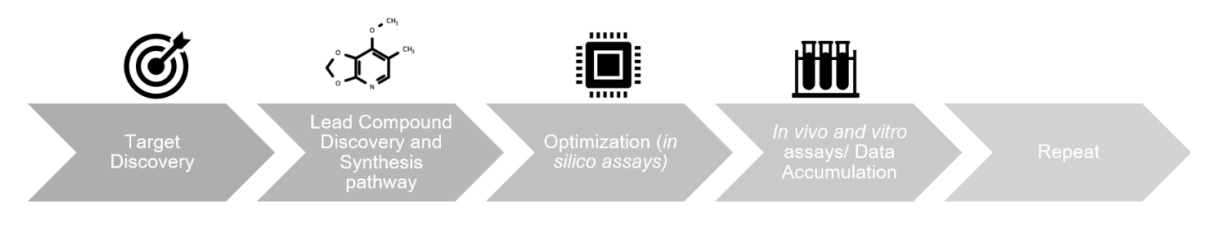

[source](https://www.mdpi.com/1420-3049/25/22/5277)

## For Lead Compound Discovery, the chemical universe of drugs is very large and keeps growing



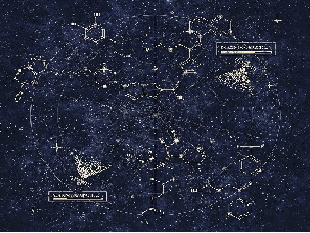

[source](https://www.nature.com/articles/549445a)

## It takes about 10 years and about $400 million to discover a new drug

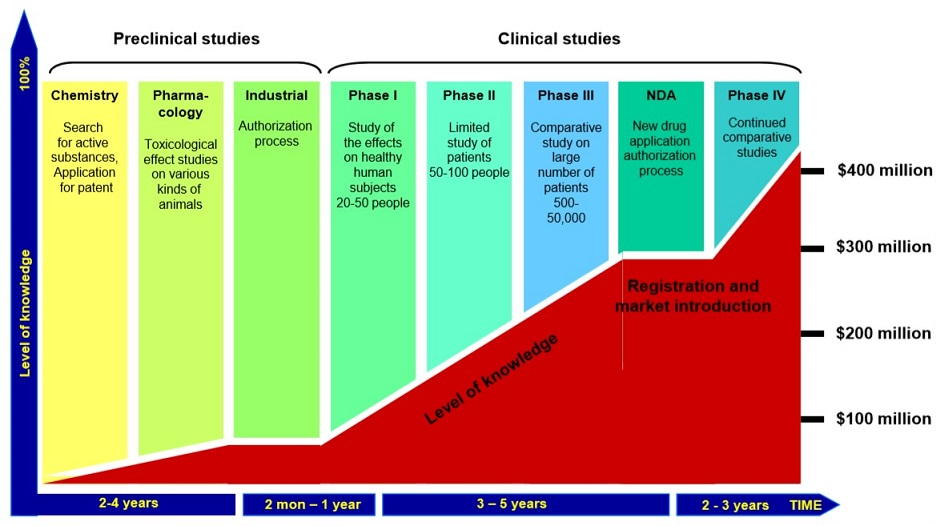

[source](https://ftloscience.com/process-costs-drug-development/)

## The Case for Artificial Intelligence for Drug Discovery:


*   Machine learning algorithms have proven to be good at complex pattern recognition tasks
*   ML solutions are fast to develop and scale




## Typical pipeline for developing ML models for Drug Discovery

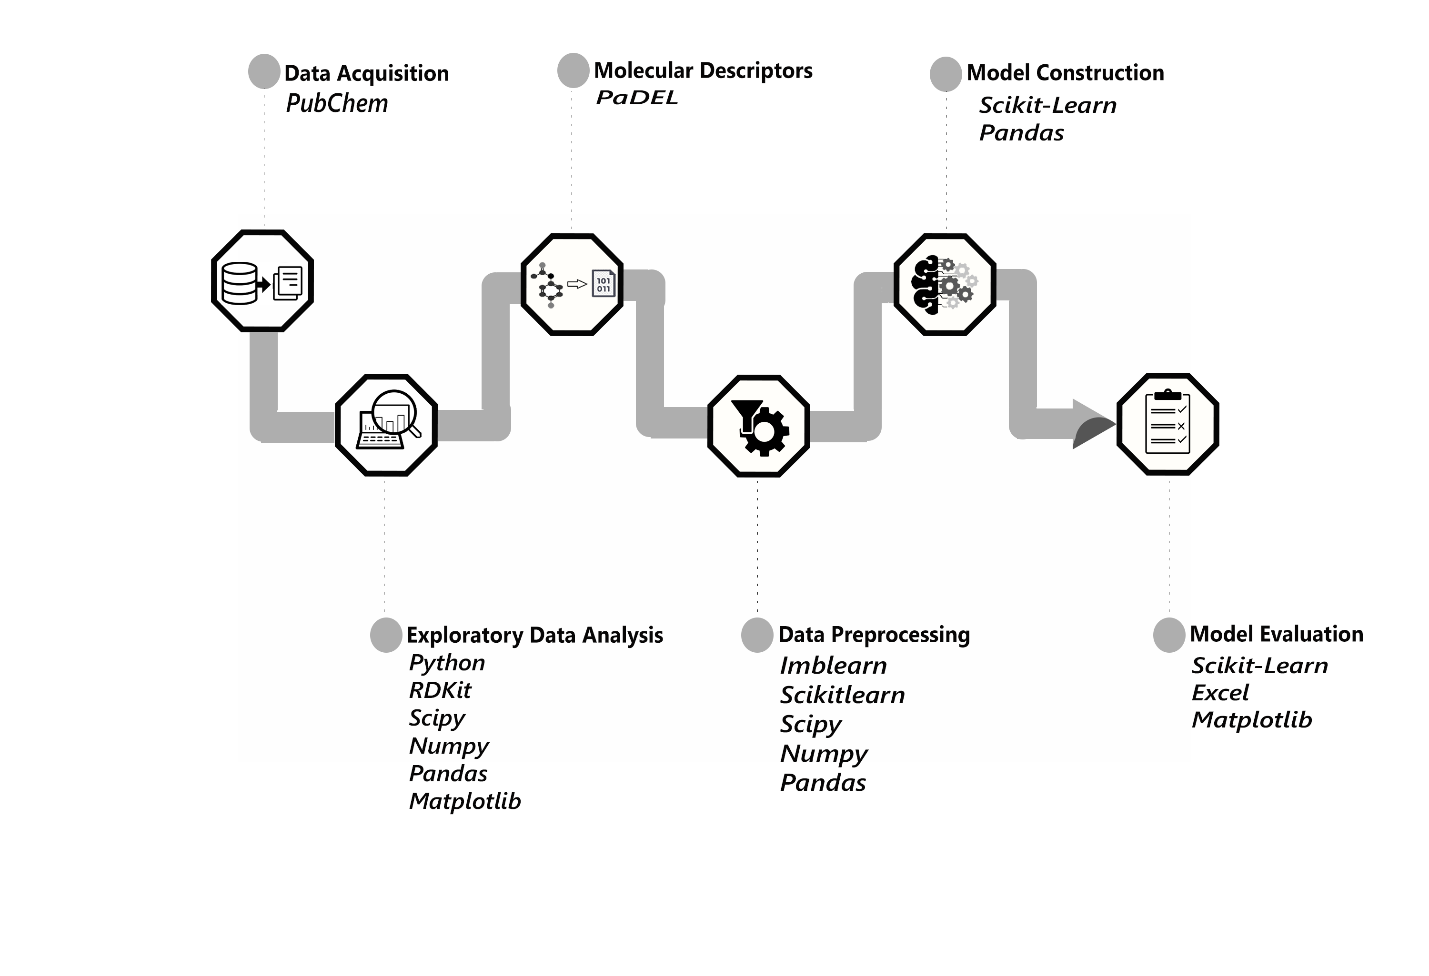

## Let's build a drug discovery ML model

In [ ]:
! pip install chembl_webresource_client
! pip install padelpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn import svm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import float32

### Target Discovery 

In [ ]:
target = new_client.target
target_query = target.search('aromatase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116


### Bioactivity Data Acquisition

In [ ]:
activity = new_client.activity
result = activity.filter(target_chembl_id='CHEMBL1978').filter(standard_type="IC50")

result_df = pd.DataFrame.from_dict(result)
result_df = result_df[result_df.standard_value.notna()]
result_df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054


In [ ]:
len(result_df)

2836

In [ ]:
activity_df = result_df[['molecule_chembl_id', 'canonical_smiles', 'standard_value']]
activity_df

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
2907,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,7900.0
2908,CHEMBL4852023,CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C,3700.0
2909,CHEMBL75,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,2400.0
2910,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,23.0


In [ ]:
activity_class = []
for i in activity_df['standard_value']:
  if float(i) >= 500:
    activity_class.append("inactive")
  elif float(i) <= 300:
    activity_class.append("active")
  else:
    activity_class.append("intermediate")

activity_df['activity_class'] = activity_class

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
activity_df['activity_class'].value_counts()

inactive        1717
active          1011
intermediate     108
Name: activity_class, dtype: int64

In [ ]:
actives = activity_df[activity_df['activity_class']=='active']
inactives = activity_df[activity_df['activity_class']=='inactive']

actives_sampled = actives.sample(150, random_state=35)
inactives_sampled = inactives.sample(150, random_state=35)

activity_df_downsampled = pd.concat([actives_sampled, inactives_sampled])

### Compute Molecular Descriptors

In [ ]:
from padelpy import from_smiles

timeout = 60*3*2*2*2
while True:
        try:
            descriptors = from_smiles(list(activity_df_downsampled['canonical_smiles']), timeout=timeout)
            break
            
        except:
            timeout = timeout*2
            print('Doubling timeout')

In [ ]:
descriptors_df = pd.DataFrame.from_dict(descriptors)
descriptors_df = descriptors_df.replace('',0)
descriptors_df = descriptors_df.astype(float32)
descriptors_df = descriptors_df.replace(np.inf, 999999999999)
descriptors_df.head()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0.0,0.4211,0.177325,16.846201,44.294308,17.0,17.0,36.0,23.0,13.0,...,0.722205,0.247699,0.451475,0.428162,0.147548,15.859995,52.340160,89.678192,0.583308,1.027184
1,0.0,-0.8851,0.783402,50.744701,46.626652,6.0,6.0,41.0,20.0,21.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0322,0.001037,18.693100,44.081516,17.0,17.0,34.0,22.0,12.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,1.6102,2.592744,88.152603,52.807034,0.0,0.0,46.0,22.0,24.0,...,0.648256,0.252609,0.509247,0.437136,0.421264,11.952082,36.150593,75.820259,0.472383,1.367648
4,0.0,-0.3390,0.114921,34.791100,39.539101,11.0,11.0,33.0,19.0,14.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
label_encode = {'inactive': 0, 'active': 1}
labels = [label_encode[i] for i in activity_df_downsampled['activity_class']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(descriptors_df, labels, 
                                                    test_size=0.1, random_state=30)

### Modelling and Evaluation

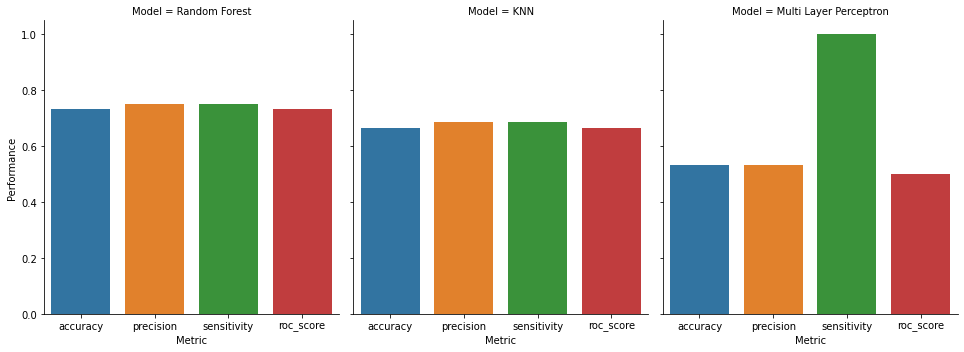

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(random_state=30),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Multi Layer Perceptron': MLPClassifier(hidden_layer_sizes=(5, 1), random_state=1)
}

accuracy = []
precision = []
sensitivity = []
roc_curve_values = []
roc_scores = []

for model_name in models:
  clf = models[model_name]

  clf.fit(X_train, y_train)

  predictions = clf.predict(X_test)

  acc = accuracy_score(y_test, predictions)
  preci = precision_score(y_test, predictions)
  sens = recall_score(y_test, predictions)
  roc_curve_value = roc_curve(y_test, predictions, pos_label=1)
  roc_score = roc_auc_score(y_test, predictions)

  accuracy.append(acc)
  precision.append(preci)
  sensitivity.append(sens)
  roc_curve_values.append(roc_curve_value)
  roc_scores.append(roc_score)


df = pd.DataFrame([])
df['Performance'] = accuracy + precision + sensitivity + roc_scores
df['Model'] = ['Random Forest', 'KNN', 'Multi Layer Perceptron'] * 4
df['Metric'] = ['accuracy']*3 + ['precision']*3 + ['sensitivity']*3 + ['roc_score']*3

sns.catplot(
    data=df, x="Metric", y="Performance", col="Model",
    kind="bar", height=5, aspect=.9
)

In [ ]:
rf_clf = RandomForestClassifier(random_state=30)
rf_clf.fit(descriptors_df, labels)

RandomForestClassifier(random_state=30)

### Saving Model

In [ ]:
import pickle

filename = 'random_forest_model.sav'
pickle.dump(rf_clf, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
def process_cpd(cpd):
  new_cpd = from_smiles([cpd])
  new_cpd = pd.DataFrame.from_dict(new_cpd)
  new_cpd = new_cpd.replace('', 0)
  new_cpd = new_cpd.astype(float32)
  new_cpd = new_cpd.replace(np.inf, 999999999999)

  return new_cpd

### Testing External Compound

In [ ]:
new_cpd = process_cpd('CCC')
pred = loaded_model.predict(new_cpd)

prediction_dict = {0:'Inactive', 1:'Active'}
prediction = prediction_dict[pred[0]]
prediction

'Inactive'